In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

In [8]:
Train=pd.read_csv('sign_mnist_train.csv')
Test=pd.read_csv('sign_mnist_test.csv')

In [9]:
Train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [10]:
#Seperating target variable
X_train=Train.drop('label',axis=1)
Y_train=Train['label']
X_test=Test.drop('label',axis=1)
Y_test=Test['label']

#scaling and reshaping

X_train = X_train / 255
X_test = X_test / 255


In [11]:

#encoding
Y_train=keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

#divdimg train into train and validation data using train test split

from sklearn.model_selection import train_test_split

X_train,X_valid,Y_train,Y_valid = train_test_split(X_train,Y_train, test_size=0.30, stratify=Y_train)
print(X_train.shape,Y_train.shape,X_valid.shape,Y_valid.shape,X_test.shape,Y_test.shape)

(19218, 784) (19218, 25) (8237, 784) (8237, 25) (7172, 784) (7172, 25)


In [12]:
Y_test[1]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Epoch 1/10
193/193 [==============================] - 5s 19ms/step - loss: 2.6239 - accuracy: 0.2203 - val_loss: 2.2253 - val_accuracy: 0.2721
Epoch 2/10
193/193 [==============================] - 4s 23ms/step - loss: 1.8286 - accuracy: 0.4200 - val_loss: 2.4482 - val_accuracy: 0.3084
Epoch 3/10
193/193 [==============================] - 3s 18ms/step - loss: 1.4320 - accuracy: 0.5362 - val_loss: 1.7345 - val_accuracy: 0.4605
Epoch 4/10
193/193 [==============================] - 3s 16ms/step - loss: 1.1663 - accuracy: 0.6173 - val_loss: 1.5612 - val_accuracy: 0.5455
Epoch 5/10
193/193 [==============================] - 3s 17ms/step - loss: 0.9377 - accuracy: 0.6902 - val_loss: 1.7813 - val_accuracy: 0.4623
Epoch 6/10
193/193 [==============================] - 4s 21ms/step - loss: 0.7874 - accuracy: 0.7392 - val_loss: 1.4192 - val_accuracy: 0.5727
Epoch 7/10
193/193 [==============================] - 4s 18ms/step - loss: 0.6829 - accuracy: 0.7752 - val_loss: 1.7134 - val_accuracy: 0.4861

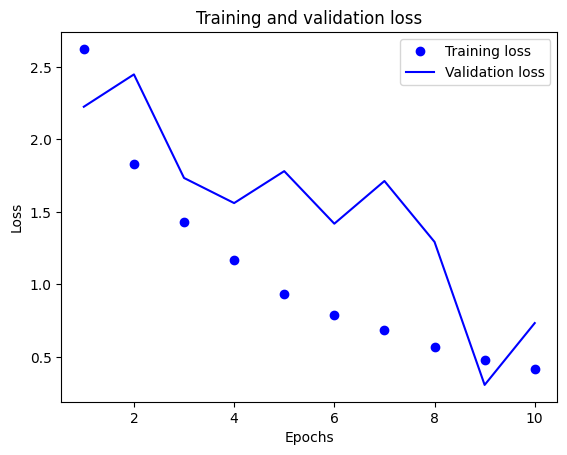

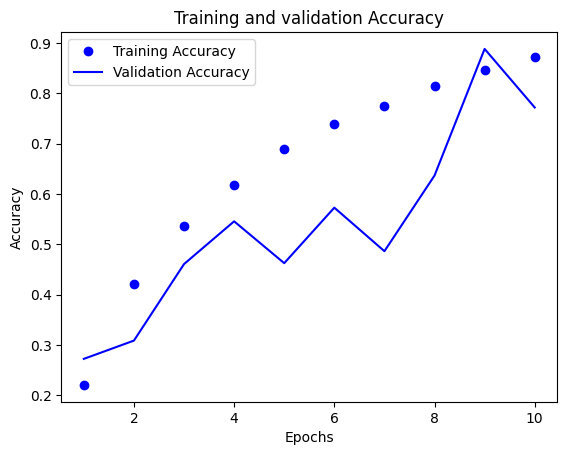

In [13]:
#basic sequential
from keras import models
from keras import layers
Model_seq = models.Sequential([
    layers.Dense(512,activation='relu'),
    layers.Dense(264,activation='relu'),
    layers.Dense(25,activation='softmax')
])

Model_seq.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

History=Model_seq.fit(X_train,Y_train,epochs=10, batch_size=100,validation_data=(X_valid,Y_valid))



import matplotlib.pyplot as plt

loss_values = History.history['loss']
val_loss_values = History.history['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

accuracy_values = History.history['accuracy']
val_accuracy_values = History.history['val_accuracy']

epochs = range(1, len(accuracy_values) + 1)
plt.plot(epochs, accuracy_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Conclusion : **

The above model is simple sequrntial model with 2 hidden layers,10 epcohs and other default values. Clearly from the above Accuracy and Loss graphs we can understand model has peformed well, but not good enough.

I will start adjusting the hyperparameters for the above model to improve accuracy

Epoch 1/30
193/193 [==============================] - 4s 16ms/step - loss: 2.9463 - accuracy: 0.1926 - val_loss: 2.6723 - val_accuracy: 0.2498
Epoch 2/30
193/193 [==============================] - 6s 29ms/step - loss: 2.3632 - accuracy: 0.3650 - val_loss: 2.1738 - val_accuracy: 0.3829
Epoch 3/30
193/193 [==============================] - 3s 17ms/step - loss: 1.9478 - accuracy: 0.4505 - val_loss: 1.9329 - val_accuracy: 0.4129
Epoch 4/30
193/193 [==============================] - 3s 15ms/step - loss: 1.6725 - accuracy: 0.5167 - val_loss: 1.6391 - val_accuracy: 0.5100
Epoch 5/30
193/193 [==============================] - 3s 17ms/step - loss: 1.4788 - accuracy: 0.5674 - val_loss: 1.5571 - val_accuracy: 0.5242
Epoch 6/30
193/193 [==============================] - 5s 24ms/step - loss: 1.3292 - accuracy: 0.6059 - val_loss: 1.3598 - val_accuracy: 0.5744
Epoch 7/30
193/193 [==============================] - 3s 17ms/step - loss: 1.2121 - accuracy: 0.6385 - val_loss: 1.2574 - val_accuracy: 0.6020

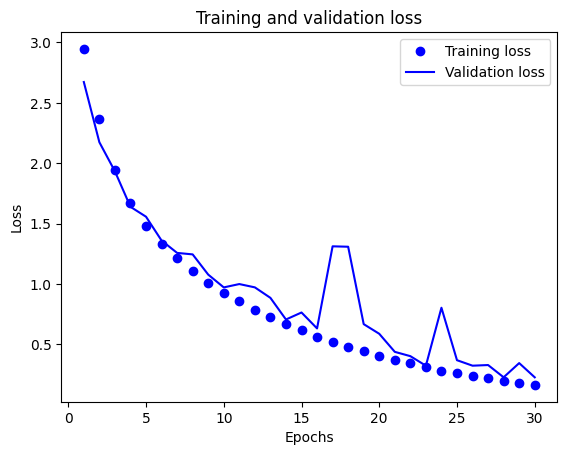

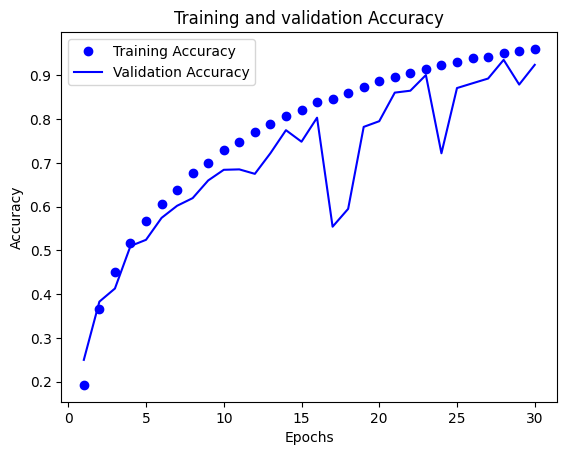

In [14]:
#adjusting learning rate and adding more layers along with momentum

# Added more layers and momentum 

from keras.callbacks import learning_rate_schedule
from keras.optimizers.legacy import rmsprop
from keras.engine.training import optimizer
from tensorflow.keras import optimizers

#basic sequential
from keras import models
from keras import layers
Model_seq = models.Sequential([
    layers.Dense(512,activation='relu'),
    layers.Dense(264,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(25,activation='softmax')
])

optimizer = rmsprop.RMSprop(learning_rate=0.0001, decay=0.000001, momentum=0.01)
Model_seq.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

History=Model_seq.fit(X_train,Y_train,epochs=30, batch_size=100,validation_data=(X_valid,Y_valid))



import matplotlib.pyplot as plt

loss_values = History.history['loss']
val_loss_values = History.history['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

accuracy_values = History.history['accuracy']
val_accuracy_values = History.history['val_accuracy']

epochs = range(1, len(accuracy_values) + 1)
plt.plot(epochs, accuracy_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [15]:
Model_seq.evaluate(X_test,Y_test)

225/225 [==============================] - 1s 6ms/step - loss: 0.8906 - accuracy: 0.7305


[0.8906326293945312, 0.7304796576499939]

**Conclusion:**

By increasing epochs to 30 and adding two extra layers along with momentum (0.01), the model has performed slightly better than the previous model. It got 10 percent jump in accuracy. Training accuracy is 96 but test accuracy is just 73, which shows that the model is overfitting. For the next model I will tune learning parameter and adding dropout layers to overcome overfitting.

Epoch 1/30
301/301 [==============================] - 6s 17ms/step - loss: 3.0341 - accuracy: 0.1079 - val_loss: 2.7124 - val_accuracy: 0.1940
Epoch 2/30
301/301 [==============================] - 5s 16ms/step - loss: 2.5844 - accuracy: 0.2131 - val_loss: 2.1565 - val_accuracy: 0.3796
Epoch 3/30
301/301 [==============================] - 4s 14ms/step - loss: 2.1939 - accuracy: 0.3110 - val_loss: 1.9695 - val_accuracy: 0.3937
Epoch 4/30
301/301 [==============================] - 5s 17ms/step - loss: 1.9251 - accuracy: 0.3872 - val_loss: 1.6174 - val_accuracy: 0.5078
Epoch 5/30
301/301 [==============================] - 4s 14ms/step - loss: 1.7011 - accuracy: 0.4529 - val_loss: 1.3336 - val_accuracy: 0.6020
Epoch 6/30
301/301 [==============================] - 4s 14ms/step - loss: 1.5199 - accuracy: 0.5140 - val_loss: 1.3218 - val_accuracy: 0.5950
Epoch 7/30
301/301 [==============================] - 5s 17ms/step - loss: 1.3756 - accuracy: 0.5481 - val_loss: 1.3840 - val_accuracy: 0.5280

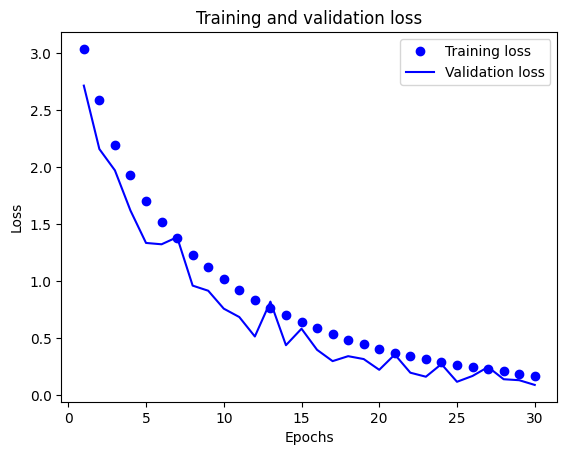

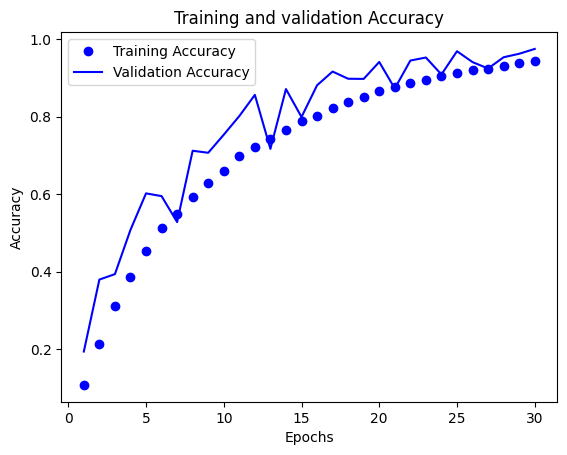

In [26]:

from keras import models
from keras import layers

from keras.optimizers.legacy import rmsprop
from keras.engine.training import optimizer
from tensorflow.keras import optimizers

Model_seq = models.Sequential([
    layers.Dense(512,activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(264,activation='relu'),
    layers.Dropout(0.15),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.15),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(25,activation='softmax')
])

callbacks_list = [
keras.callbacks.EarlyStopping(
monitor='accuracy',
patience=1,
),
keras.callbacks.ReduceLROnPlateau(
monitor='val_loss',
factor=0.1,
patience=2,
),
keras.callbacks.ModelCheckpoint(
filepath='my_model.h5',
monitor='val_loss',
save_best_only=True,
)
]

optimizer = rmsprop.RMSprop(learning_rate=0.0001,decay=0.000001, momentum=0.01)
Model_seq.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

History=Model_seq.fit(X_train,Y_train,epochs=30, batch_size=64,validation_data=(X_valid,Y_valid))



import matplotlib.pyplot as plt

loss_values = History.history['loss']
val_loss_values = History.history['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

accuracy_values = History.history['accuracy']
val_accuracy_values = History.history['val_accuracy']

epochs = range(1, len(accuracy_values) + 1)
plt.plot(epochs, accuracy_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [27]:
Model_seq.evaluate(X_test,Y_test)

225/225 [==============================] - 1s 4ms/step - loss: 0.8600 - accuracy: 0.7720


[0.8600468039512634, 0.7720301151275635]

Conclusion:

I have added dropout layers in this model. After trying different dropout sizes, Training accuracy has dropped 2 percent and test accuracy has increased 4 percent. This model is a bit generalized compared to prevoius model, but still overfitting is an issue.

**bold text**

TRYING CNN 

In [28]:
#basic conv2d
#reshaping image into 28 by 28 pixel
X_Train = X_train.values.reshape(-1,28,28,1)
X_Valid = X_valid.values.reshape(-1,28,28,1)
X_Test = X_test.values.reshape(-1,28,28,1)

Epoch 1/10
193/193 [==============================] - 26s 126ms/step - loss: 2.2715 - accuracy: 0.3101 - val_loss: 1.1075 - val_accuracy: 0.6245
Epoch 2/10
193/193 [==============================] - 23s 121ms/step - loss: 0.7073 - accuracy: 0.7801 - val_loss: 0.4490 - val_accuracy: 0.8538
Epoch 3/10
193/193 [==============================] - 22s 115ms/step - loss: 0.3050 - accuracy: 0.9070 - val_loss: 0.1853 - val_accuracy: 0.9493
Epoch 4/10
193/193 [==============================] - 23s 121ms/step - loss: 0.1292 - accuracy: 0.9675 - val_loss: 0.0944 - val_accuracy: 0.9783
Epoch 5/10
193/193 [==============================] - 26s 134ms/step - loss: 0.0565 - accuracy: 0.9896 - val_loss: 0.0451 - val_accuracy: 0.9896
Epoch 6/10
193/193 [==============================] - 23s 121ms/step - loss: 0.0277 - accuracy: 0.9961 - val_loss: 0.0264 - val_accuracy: 0.9966
Epoch 7/10
193/193 [==============================] - 21s 111ms/step - loss: 0.0169 - accuracy: 0.9977 - val_loss: 0.0188 - val_ac

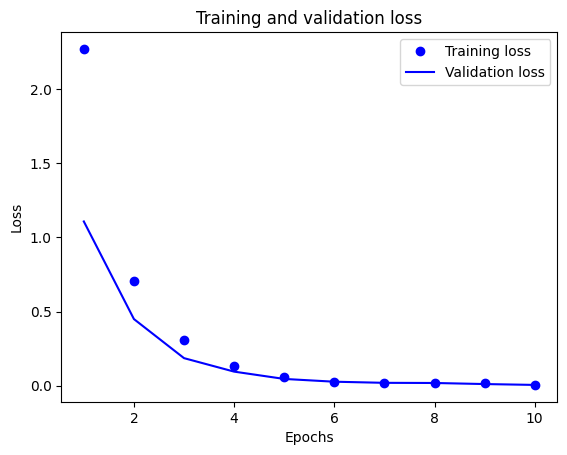

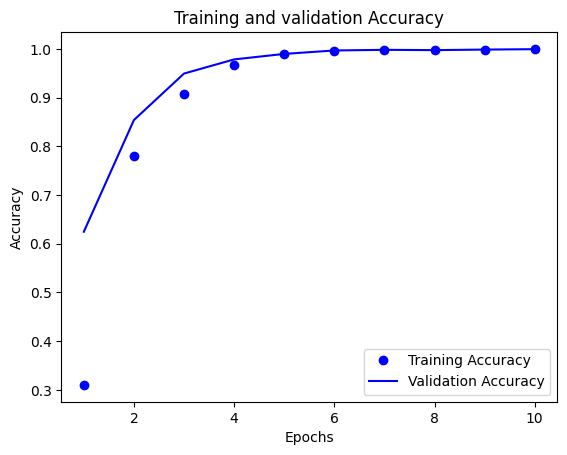

In [29]:
#basic conv2d 


from keras.layers.reshaping.flatten import Flatten

model_conv=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(25,activation='softmax')
 
])

model_conv.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

History=model_conv.fit(X_Train,Y_train,epochs=10, batch_size=100,validation_data=(X_Valid,Y_valid))



import matplotlib.pyplot as plt

loss_values = History.history['loss']
val_loss_values = History.history['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

accuracy_values = History.history['accuracy']
val_accuracy_values = History.history['val_accuracy']

epochs = range(1, len(accuracy_values) + 1)
plt.plot(epochs, accuracy_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
model_conv.evaluate(X_Test,Y_test,verbose=2)

225/225 - 4s - loss: 0.4546 - accuracy: 0.8911 - 4s/epoch - 17ms/step


[0.4545690417289734, 0.8911042809486389]

**Conclusion: **

Basic CNN model has performed outsanding. It has reached an accuracy of 99.98 percent which is really a good. But test accuracy is at 89 percent. In the next model I will try increase generalization by adding dropout layers and regularization to overcome any overfitting model has.

Epoch 1/10
301/301 [==============================] - 27s 84ms/step - loss: 2.1603 - accuracy: 0.3609 - val_loss: 1.1926 - val_accuracy: 0.6430
Epoch 2/10
301/301 [==============================] - 26s 87ms/step - loss: 0.8456 - accuracy: 0.7657 - val_loss: 0.5213 - val_accuracy: 0.8811
Epoch 3/10
301/301 [==============================] - 26s 86ms/step - loss: 0.4938 - accuracy: 0.8839 - val_loss: 0.3203 - val_accuracy: 0.9512
Epoch 4/10
301/301 [==============================] - 25s 85ms/step - loss: 0.3631 - accuracy: 0.9320 - val_loss: 0.2671 - val_accuracy: 0.9747
Epoch 5/10
301/301 [==============================] - 27s 91ms/step - loss: 0.2822 - accuracy: 0.9588 - val_loss: 0.2139 - val_accuracy: 0.9891
Epoch 6/10
301/301 [==============================] - 26s 87ms/step - loss: 0.2415 - accuracy: 0.9711 - val_loss: 0.1908 - val_accuracy: 0.9890
Epoch 7/10
301/301 [==============================] - 25s 83ms/step - loss: 0.2062 - accuracy: 0.9823 - val_loss: 0.1586 - val_accuracy:

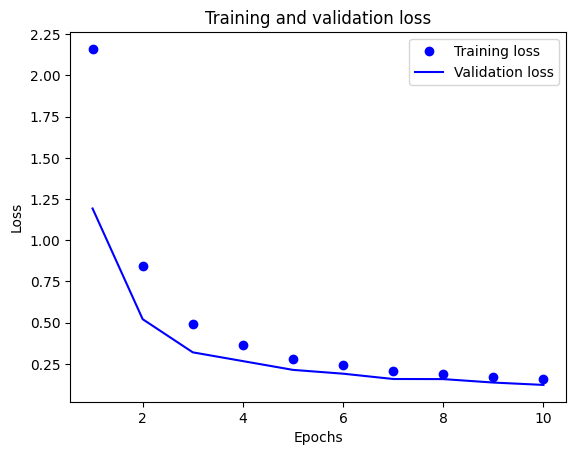

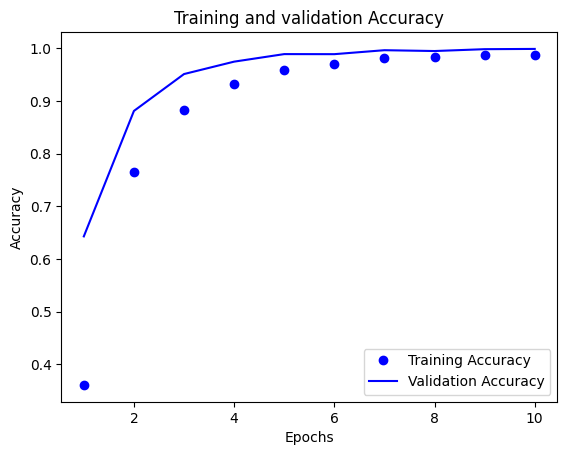

In [32]:
#measures to reduce overfitting
#add regularization
model_conv=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1),kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.15),
    layers.Conv2D(64,(3,3),activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.15),
    layers.Conv2D(64,(3,3),activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(25,activation='softmax')

    
])

callbacks_list = [
keras.callbacks.EarlyStopping(
monitor='accuracy',
patience=1,
),
keras.callbacks.ReduceLROnPlateau(
monitor='val_loss',
factor=0.1,
patience=2,
),
keras.callbacks.ModelCheckpoint(
filepath='my_model.h5',
monitor='val_loss',
save_best_only=True,
)
]


model_conv.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

History=model_conv.fit(X_Train,Y_train,epochs=10, batch_size=64,validation_data=(X_Valid,Y_valid))



import matplotlib.pyplot as plt

loss_values = History.history['loss']
val_loss_values = History.history['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

accuracy_values = History.history['accuracy']
val_accuracy_values = History.history['val_accuracy']

epochs = range(1, len(accuracy_values) + 1)
plt.plot(epochs, accuracy_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
model_conv.evaluate(X_Test,Y_test,verbose=2)

225/225 - 2s - loss: 0.4100 - accuracy: 0.9131 - 2s/epoch - 10ms/step


[0.4100276529788971, 0.9131343960762024]

**Conclusion:**

After fine tunning percent of droupout neurons in each layer and regularization parameter Test accuracy has increased 3 percent. Training accuracy at 98.81 and test accuracy of 91.3 percent is an acceptable model.

For the next advancment i will be applying data augmentation.

In [35]:
#agumention


datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images horizontally
        vertical_flip=False)  # Don't randomly flip images vertically

datagen.fit(X_Train)

X_Train.shape

(19218, 28, 28, 1)

Epoch 1/10
301/301 [==============================] - 25s 79ms/step - loss: 1.8252 - accuracy: 0.4431 - val_loss: 0.7190 - val_accuracy: 0.7627
Epoch 2/10
301/301 [==============================] - 23s 75ms/step - loss: 0.4419 - accuracy: 0.8589 - val_loss: 0.2515 - val_accuracy: 0.9239
Epoch 3/10
301/301 [==============================] - 24s 79ms/step - loss: 0.1452 - accuracy: 0.9596 - val_loss: 0.0742 - val_accuracy: 0.9826
Epoch 4/10
301/301 [==============================] - 24s 79ms/step - loss: 0.0464 - accuracy: 0.9907 - val_loss: 0.0303 - val_accuracy: 0.9955
Epoch 5/10
301/301 [==============================] - 23s 78ms/step - loss: 0.0166 - accuracy: 0.9982 - val_loss: 0.0124 - val_accuracy: 0.9992
Epoch 6/10
301/301 [==============================] - 22s 75ms/step - loss: 0.0064 - accuracy: 0.9997 - val_loss: 0.0053 - val_accuracy: 0.9995
Epoch 7/10
301/301 [==============================] - 24s 80ms/step - loss: 0.0190 - accuracy: 0.9944 - val_loss: 0.2330 - val_accuracy:

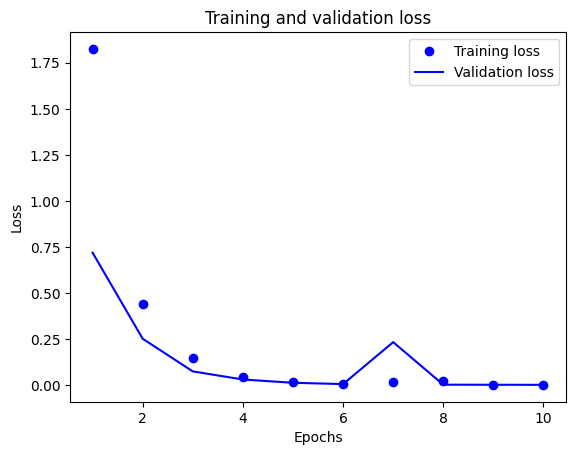

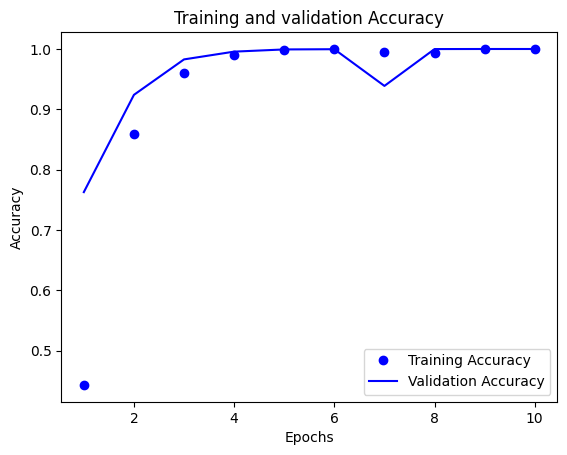

In [36]:

model_aug=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(25,activation='softmax')
])

callbacks_list = [
keras.callbacks.EarlyStopping(
monitor='accuracy',
min_delta=0.001,
patience=1,
restore_best_weights=True,
),
keras.callbacks.ReduceLROnPlateau(
monitor='val_loss',
factor=0.1,
patience=2,
),
keras.callbacks.ModelCheckpoint(
filepath='my_model.h5',
monitor='val_loss',
save_best_only=True,
)
]

model_aug.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

History=model_aug.fit(X_Train,Y_train,epochs=10, batch_size=64,validation_data=(X_Valid,Y_valid))



import matplotlib.pyplot as plt

loss_values = History.history['loss']
val_loss_values = History.history['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

accuracy_values = History.history['accuracy']
val_accuracy_values = History.history['val_accuracy']

epochs = range(1, len(accuracy_values) + 1)
plt.plot(epochs, accuracy_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
model_aug.evaluate(X_Test,Y_test,verbose=2)

225/225 - 3s - loss: 0.5603 - accuracy: 0.8938 - 3s/epoch - 14ms/step


[0.5602708458900452, 0.8937534689903259]

**Conclusion: **

Basic CNN model with data augementation has performed outsanding well on training data. It has reached an accuracy of 100 percent, but test accuracy is at 89 percent. In the next model I will try increase generalization by adding dropout layers and increasing strides to overcome the overfitting model has.

Epoch 1/10
301/301 [==============================] - 27s 87ms/step - loss: 2.0740 - accuracy: 0.3607 - val_loss: 0.8416 - val_accuracy: 0.7410
Epoch 2/10
301/301 [==============================] - 25s 84ms/step - loss: 0.5745 - accuracy: 0.8128 - val_loss: 0.2614 - val_accuracy: 0.9233
Epoch 3/10
301/301 [==============================] - 25s 84ms/step - loss: 0.2456 - accuracy: 0.9210 - val_loss: 0.1351 - val_accuracy: 0.9573
Epoch 4/10
301/301 [==============================] - 27s 90ms/step - loss: 0.1349 - accuracy: 0.9560 - val_loss: 0.0727 - val_accuracy: 0.9851
Epoch 5/10
301/301 [==============================] - 25s 83ms/step - loss: 0.0811 - accuracy: 0.9751 - val_loss: 0.0224 - val_accuracy: 0.9967
Epoch 6/10
301/301 [==============================] - 27s 89ms/step - loss: 0.0566 - accuracy: 0.9842 - val_loss: 0.0132 - val_accuracy: 0.9987
Epoch 7/10
301/301 [==============================] - 31s 103ms/step - loss: 0.0385 - accuracy: 0.9884 - val_loss: 0.0109 - val_accuracy

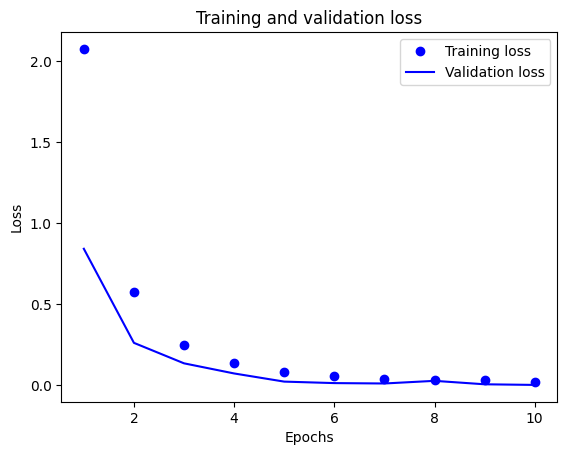

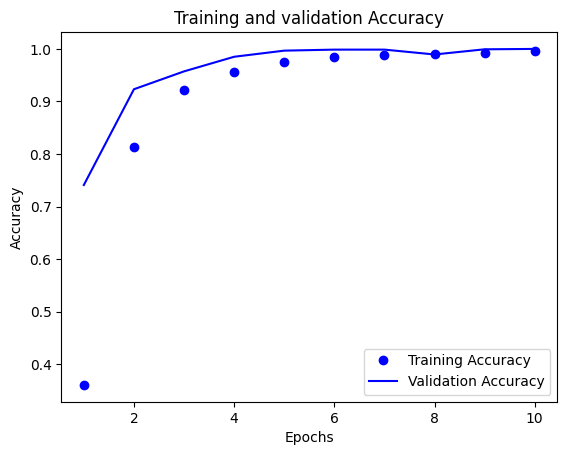

In [38]:
#reducing overfitting by adding dropouts and increasing strides

model_aug=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)),
    layers.MaxPool2D((2,2),strides=(2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2),strides=(2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(25,activation='softmax')
])

callbacks_list = [
keras.callbacks.EarlyStopping(
monitor='accuracy',
min_delta=0.001,
patience=1,
restore_best_weights=True,
),
keras.callbacks.ReduceLROnPlateau(
monitor='val_loss',
factor=0.1,
patience=2,
),
keras.callbacks.ModelCheckpoint(
filepath='my_model.h5',
monitor='val_loss',
save_best_only=True,
)
]

model_aug.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

History=model_aug.fit(X_Train,Y_train,epochs=10, batch_size=64,validation_data=(X_Valid,Y_valid))



import matplotlib.pyplot as plt

loss_values = History.history['loss']
val_loss_values = History.history['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

accuracy_values = History.history['accuracy']
val_accuracy_values = History.history['val_accuracy']

epochs = range(1, len(accuracy_values) + 1)
plt.plot(epochs, accuracy_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
model_aug.evaluate(X_Test,Y_test,verbose=2)

225/225 - 2s - loss: 0.3189 - accuracy: 0.9182 - 2s/epoch - 9ms/step


[0.31892481446266174, 0.9181539416313171]

Epoch 1/10
301/301 [==============================] - 70s 228ms/step - loss: 1.4618 - accuracy: 0.5413 - val_loss: 2.9910 - val_accuracy: 0.0913
Epoch 2/10
301/301 [==============================] - 62s 207ms/step - loss: 0.3569 - accuracy: 0.8825 - val_loss: 1.2213 - val_accuracy: 0.5984
Epoch 3/10
301/301 [==============================] - 62s 206ms/step - loss: 0.1613 - accuracy: 0.9479 - val_loss: 0.0440 - val_accuracy: 0.9937
Epoch 4/10
301/301 [==============================] - 60s 201ms/step - loss: 0.0989 - accuracy: 0.9695 - val_loss: 0.2232 - val_accuracy: 0.9285
Epoch 5/10
301/301 [==============================] - 60s 199ms/step - loss: 0.0759 - accuracy: 0.9764 - val_loss: 0.1086 - val_accuracy: 0.9601
Epoch 6/10
301/301 [==============================] - 61s 203ms/step - loss: 0.0603 - accuracy: 0.9819 - val_loss: 0.0197 - val_accuracy: 0.9950
Epoch 7/10
301/301 [==============================] - 62s 206ms/step - loss: 0.0516 - accuracy: 0.9833 - val_loss: 0.0375 - val_ac

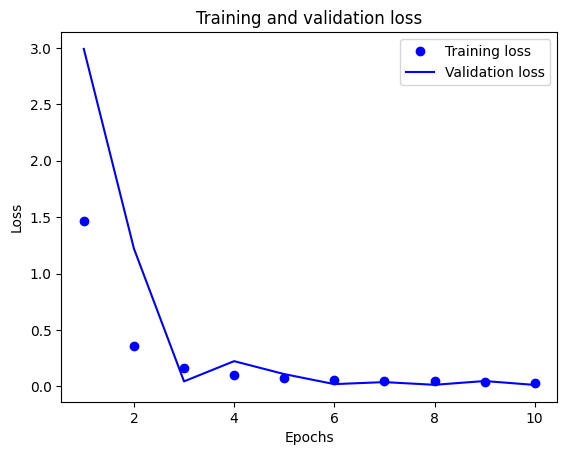

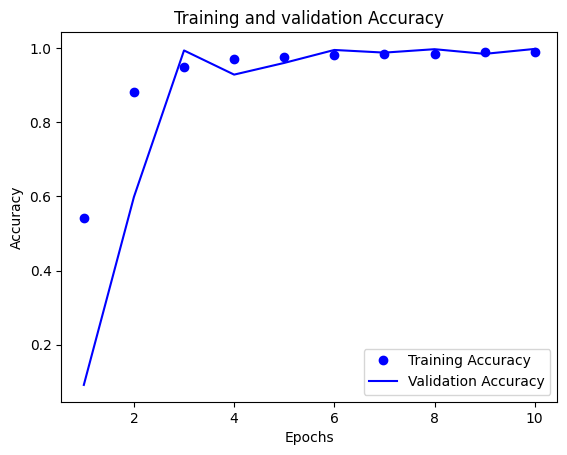

In [42]:
#changing activation function and applying batch normalizatin

model_aug=models.Sequential([
    layers.Conv2D(64,(3,3),activation='swish', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.MaxPool2D((2,2),strides=(2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(64,(3,3),activation='swish'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2,2),strides=(2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(64,(3,3),activation='swish'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2,2),strides=(2,2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(64,activation='swish'),
    layers.Dense(25,activation='softmax')
])

callbacks_list = [
keras.callbacks.EarlyStopping(
monitor='accuracy',
min_delta=0.001,
patience=2,
restore_best_weights=True,
),
keras.callbacks.ReduceLROnPlateau(
monitor='val_loss',
factor=0.1,
patience=2,
),
keras.callbacks.ModelCheckpoint(
filepath='my_model.h5',
monitor='val_loss',
save_best_only=True,
)
]

model_aug.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

History=model_aug.fit(X_Train,Y_train,epochs=10, batch_size=64,validation_data=(X_Valid,Y_valid))



import matplotlib.pyplot as plt

loss_values = History.history['loss']
val_loss_values = History.history['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

accuracy_values = History.history['accuracy']
val_accuracy_values = History.history['val_accuracy']

epochs = range(1, len(accuracy_values) + 1)
plt.plot(epochs, accuracy_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [43]:
model_aug.evaluate(X_Test,Y_test,verbose=2)


225/225 - 4s - loss: 0.1898 - accuracy: 0.9378 - 4s/epoch - 19ms/step


[0.1897791028022766, 0.9378136992454529]

**Conclusion:**
After fine tunning percent of droupout neurons in each layer,adding batch normalization and changing activation function, Test accuracy has increased 3 percent. Training accuracy at 98.99 and test accuracy of 93.7 percent is good model model.
